In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re

import warnings
warnings.filterwarnings('ignore')

In [175]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [191]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\국민건강보험공단_건강검진정보\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\국민건강보험공단_건강검진정보\\국민건강보험공단_건강검진정보_20211229.CSV']

In [192]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

In [179]:
df.describe()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999892.000000,999743.000000,999748.000000,...,987859.000000,992398.000000,992399.000000,992398.000000,992397.000000,999657.000000,999804.000000,1000000.000000,331383.00000,331382.000000
mean,2020.0,500000.500000,34.047725,1.489311,11.917757,160.964085,63.060790,82.357094,0.933045,0.935036,...,1.122333,0.851984,27.698337,26.759641,37.778292,1.557421,0.584800,0.331384,0.16859,0.584661
std,0.0,288675.278932,12.443883,0.499886,2.171036,9.197899,12.269907,9.622632,0.637453,0.644911,...,0.493386,0.369630,25.286659,25.835091,51.815871,0.783742,0.492757,0.470711,0.37439,0.589833
min,2020.0,1.000000,11.000000,1.000000,9.000000,130.000000,30.000000,5.800000,0.100000,0.100000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,2020.0,250000.750000,27.000000,1.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,1.000000,0.700000,20.000000,16.000000,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,2020.0,500000.500000,41.000000,1.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,1.000000,0.800000,24.000000,21.000000,24.000000,1.000000,1.000000,0.000000,0.00000,1.000000
75%,2020.0,750000.250000,44.000000,2.000000,13.000000,170.000000,70.000000,89.000000,1.200000,1.200000,...,1.000000,1.000000,30.000000,31.000000,40.000000,2.000000,1.000000,1.000000,0.00000,1.000000
max,2020.0,1000000.000000,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,...,6.000000,95.000000,8712.000000,5990.000000,2630.000000,3.000000,1.000000,1.000000,1.00000,2.000000


In [180]:
df.describe(include=np.object)

,데이터 공개일자
count,1000000
unique,1
top,2021-12-29
freq,1000000


In [181]:
df.isnull().sum()

기준년도                 0
가입자 일련번호             0
시도코드                 0
성별코드                 0
연령대 코드(5세단위)         0
신장(5Cm단위)            0
체중(5Kg 단위)           0
허리둘레               108
시력(좌)              257
시력(우)              252
청력(좌)              222
청력(우)              230
수축기 혈압            7532
이완기 혈압            7534
식전혈당(공복혈당)        7602
총 콜레스테롤         597694
트리글리세라이드        597678
HDL 콜레스테롤       597685
LDL 콜레스테롤       605529
혈색소               7611
요단백              12141
혈청크레아티닌           7602
(혈청지오티)AST        7601
(혈청지오티)ALT        7602
감마 지티피            7603
흡연상태               343
음주여부               196
구강검진 수검여부            0
치아우식증유무         668617
치석              668618
데이터 공개일자             0
dtype: int64

## 전처리

In [194]:
sex_dict = {1:'남자',2:'여자'}
age_dict = {1:'00~04세',2:'05~09세',3:'10~14세',4:'15~19세',5:'20~24세',6:'25~29세',7:'30~34세',8:'35~39세',9:'40~44세',10:'45~49세',
            11:'50~54세',12:'55~59세',13:'60~64세',14:'65~69세',15:'70~74세',16:'75~79세',17:'80~84세',18:'85세~'}
sido_dict = {11:'서울특별시',26:'부산광역시',27:'대구광역시',28:'인천광역시',29:'광주광역시',30:'대전광역시',31:'울산광역시',36:'세종특별자치시',
            41:'경기도',42:'강원도',43:'충청북도',44:'충청남도',45:'전라북도',46:'전라남도',47:'경상북도',48:'경상남도',49:'제주특별자치도'}
sound_dict = {1:'정상',2:'질환의심',3:'측정 불가',-1:'미측정'}
smoke_dict = {1:'비흡연',2:'피웠다 끊음',3:'흡연',-1:'미측정'}
drink_dict = {0:'마시지 않음',1:'마심',-1:'미측정'}
mouth_dict = {0:'미수검',1:'수검'}
teeth_dict = {0:'없음',1:'있음',-1:'미측정'}
tar_dict = {0:'없음',1:'있음',2:'측정 불가',-1:'미측정'}
olig_dict = { 1 : '-', 2:'±', 3:'+1', 4:'+2', 5:'+3', 6:'+4',-1:'미측정'}

In [196]:
df['시도코드'] = df['시도코드'].apply(lambda x:sido_dict[x])
df['성별코드'] = df['성별코드'].apply(lambda x:sex_dict[x])
df['연령대 코드(5세단위)'] = df['연령대 코드(5세단위)'].apply(lambda x:age_dict[x])

df.fillna(-1,inplace=True)
df['청력(좌)'] = df['청력(좌)'].apply(lambda x:sound_dict[x])
df['청력(우)'] = df['청력(우)'].apply(lambda x:sound_dict[x])
df['흡연상태'] = df['흡연상태'].apply(lambda x:smoke_dict[x])
df['음주여부'] = df['음주여부'].apply(lambda x:drink_dict[x])
df['구강검진 수검여부'] = df['구강검진 수검여부'].apply(lambda x:mouth_dict[x])
df['치아우식증유무'] = df['치아우식증유무'].apply(lambda x:teeth_dict[x])
df['치석'] = df['치석'].apply(lambda x:tar_dict[x])
df['요단백'] = df['요단백'].apply(lambda x:olig_dict[x])

In [197]:
df['시력(좌)'] = df['시력(좌)'].apply(lambda x:-1 if x==9.9 else x)
df['시력(우)'] = df['시력(우)'].apply(lambda x:-1 if x==9.9 else x)

In [198]:
df[['시력(좌)','시력(우)','신장(5Cm단위)','체중(5Kg 단위)']] = df[['시력(좌)','시력(우)','신장(5Cm단위)','체중(5Kg 단위)']].astype('str')

In [199]:
df.describe()

,기준년도,가입자 일련번호,허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피
count,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2020.0,500000.500000,82.348092,123.884108,76.229706,103.457559,79.243041,53.248005,22.24161,45.083551,14.093700,0.837905,27.480201,26.548612,37.483460
std,0.0,288675.278932,9.661024,18.284661,12.014273,26.916000,101.574233,91.615435,30.20632,62.174462,2.035762,0.401825,25.313386,25.849401,51.728304
min,2020.0,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2020.0,250000.750000,76.000000,115.000000,70.000000,91.000000,-1.000000,-1.000000,-1.00000,-1.000000,13.200000,0.700000,20.000000,16.000000,16.000000
50%,2020.0,500000.500000,82.000000,124.000000,77.000000,99.000000,-1.000000,-1.000000,-1.00000,-1.000000,14.200000,0.800000,24.000000,21.000000,24.000000
75%,2020.0,750000.250000,89.000000,134.000000,83.000000,109.000000,185.000000,93.000000,51.00000,102.000000,15.300000,1.000000,30.000000,31.000000,40.000000
max,2020.0,1000000.000000,999.000000,260.000000,190.000000,950.000000,2416.000000,6999.000000,960.00000,2395.000000,25.000000,95.000000,8712.000000,5990.000000,2630.000000


In [200]:
df.describe(include=np.object)

,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),청력(우),요단백,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,17,2,10,14,22,24,24,4,4,7,4,3,2,3,4,1
top,경기도,남자,50~54세,160,60,1.0,1.0,정상,정상,-,비흡연,마심,미수검,미측정,미측정,2021-12-29
freq,247369,510689,175705,184993,158678,202138,206683,955154,957287,914825,626138,584685,668616,668617,668618,1000000


## 시각화

In [206]:
num_cols = ['허리둘레','수축기 혈압','이완기 혈압','식전혈당(공복혈당)','총 콜레스테롤','트리글리세라이드',
            'HDL 콜레스테롤','LDL 콜레스테롤','혈색소','혈청크레아티닌','(혈청지오티)AST','(혈청지오티)ALT','감마 지티피']
cat_cols = ['연령대 코드(5세단위)','신장(5Cm단위)','체중(5Kg 단위)','시력(좌)','시력(우)',
            '청력(좌)','청력(우)','요단백','흡연상태','음주여부','구강검진 수검여부','치아우식증유무','치석']

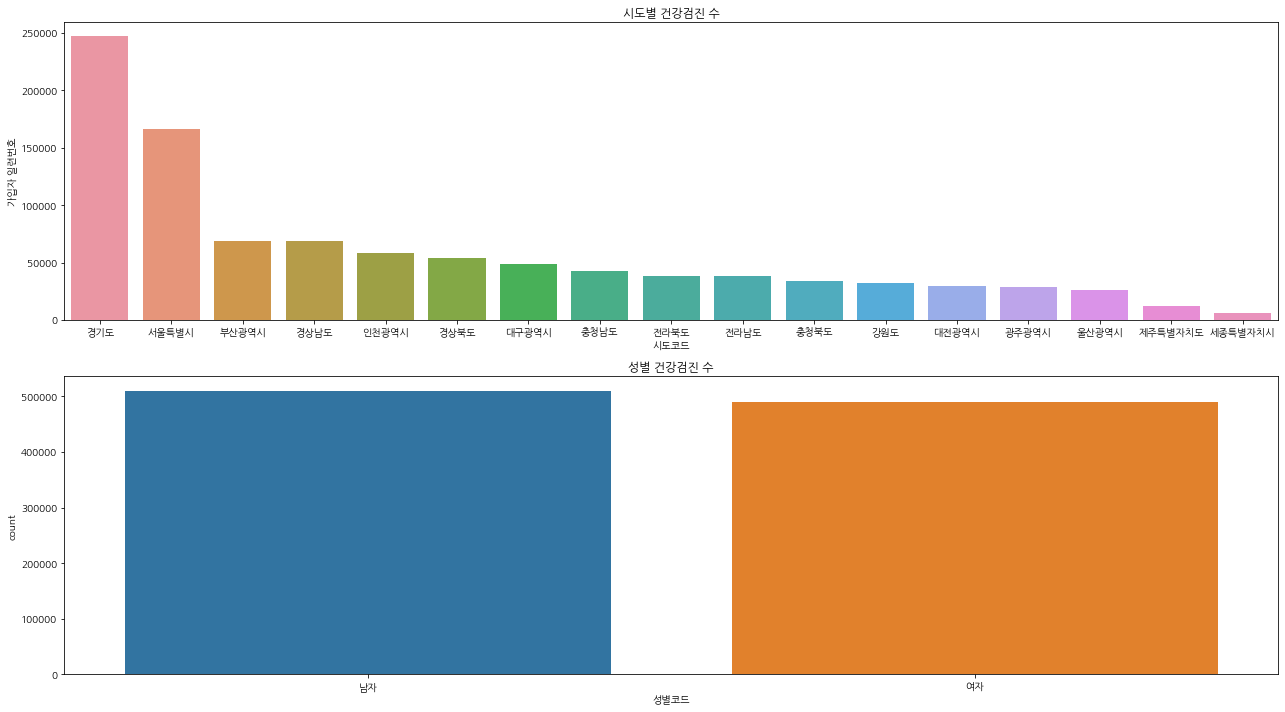

In [207]:
fig,axes = plt.subplots(2,1,figsize=(18,10))
sub_df = df.groupby('시도코드',as_index=False)['가입자 일련번호'].count().sort_values('가입자 일련번호',ascending=False)
sns.barplot(data=sub_df,x='시도코드',y='가입자 일련번호',ax=axes[0]).set(title='시도별 건강검진 수')
sns.countplot(data=df,x='성별코드',ax=axes[1]).set(title='성별 건강검진 수')
plt.tight_layout()

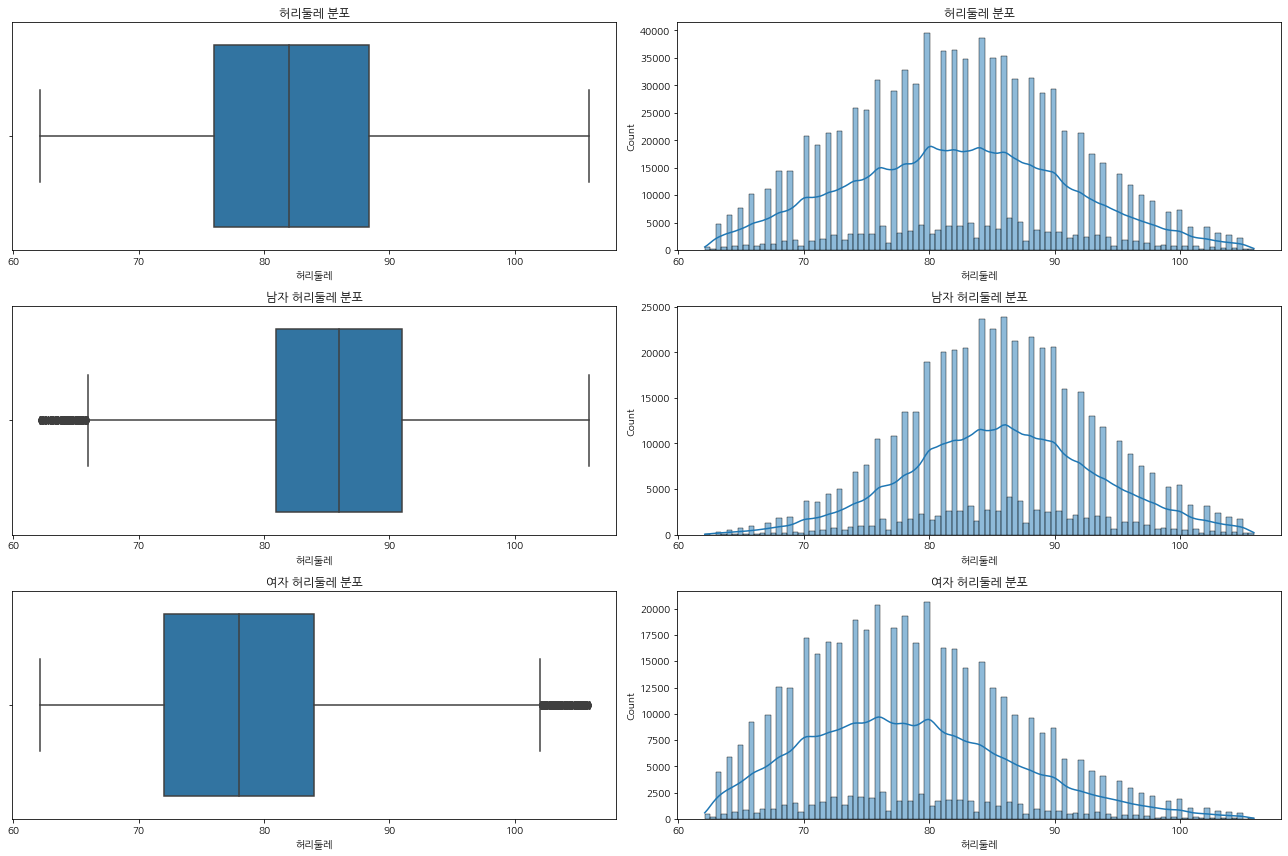

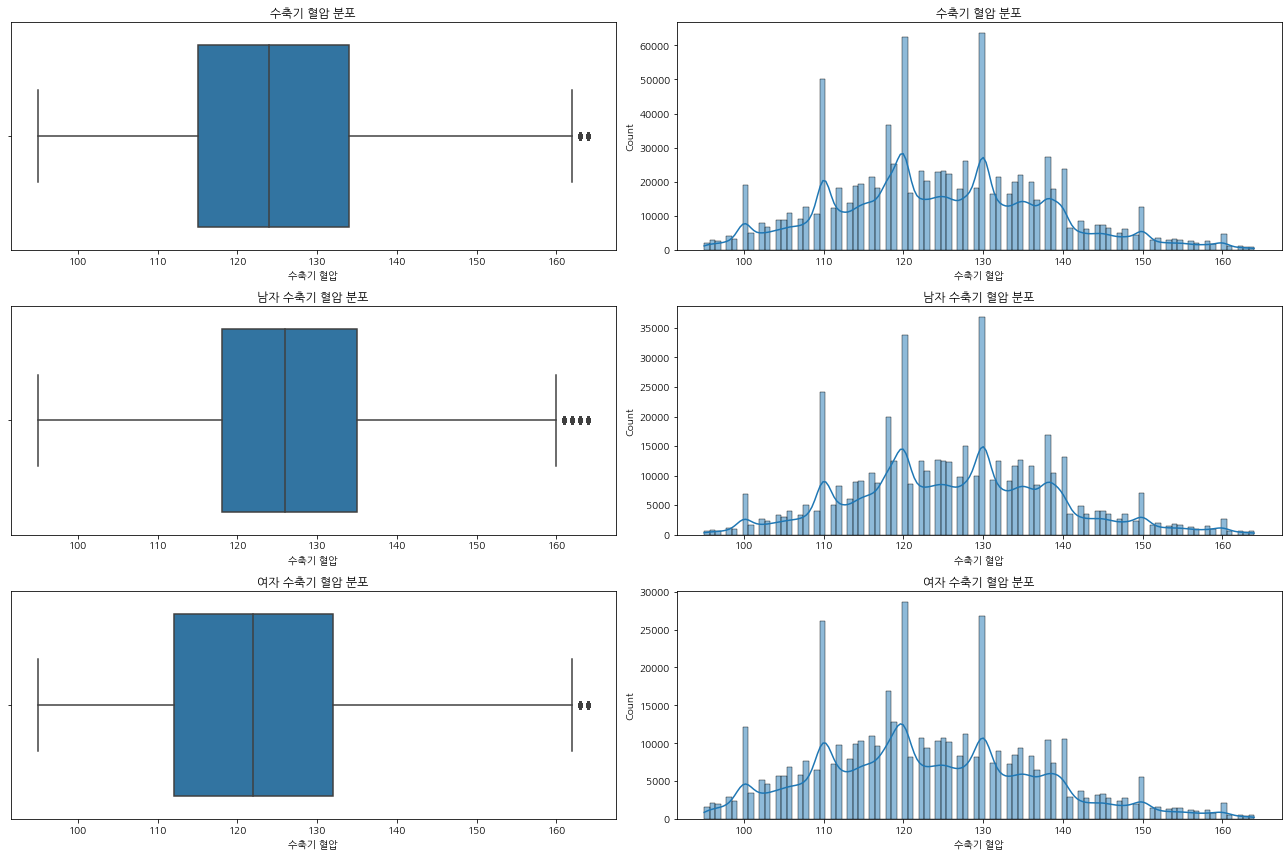

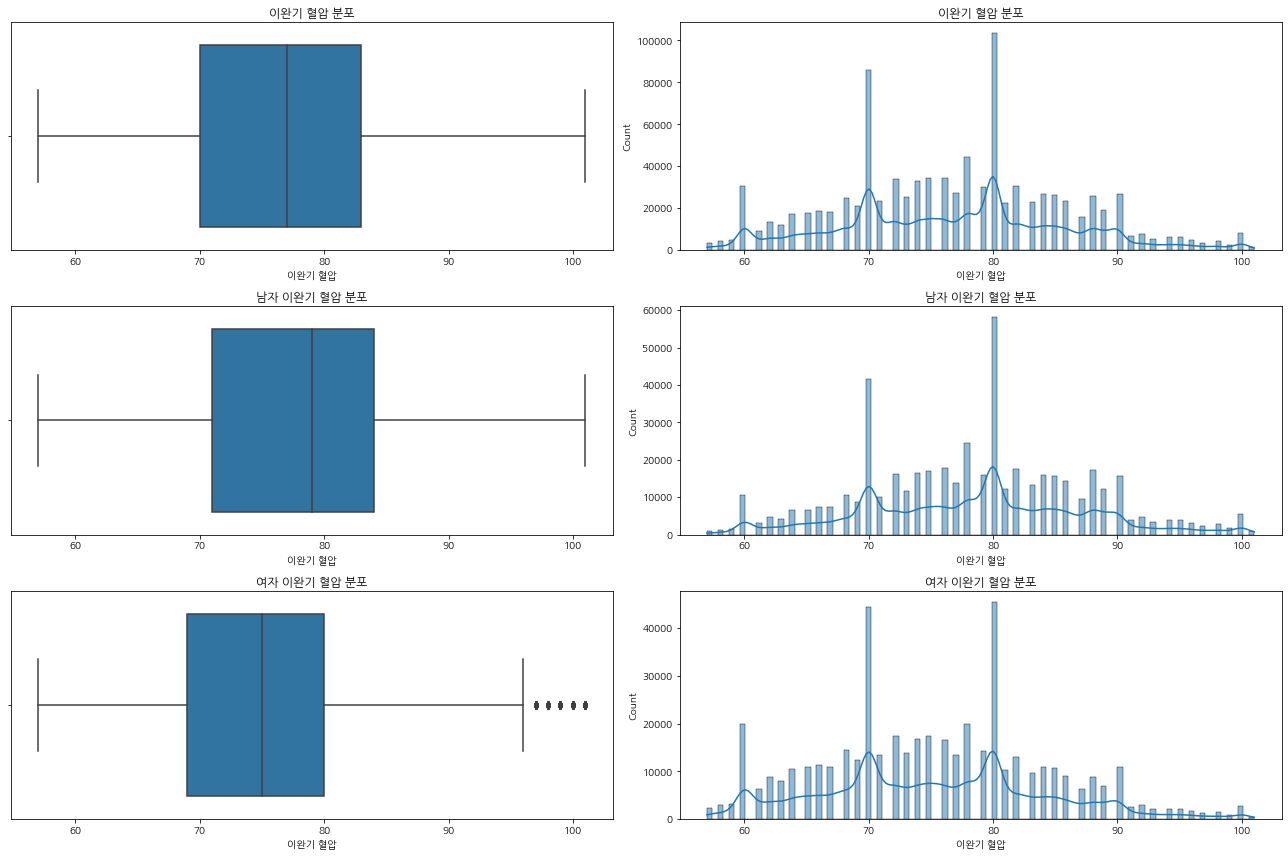

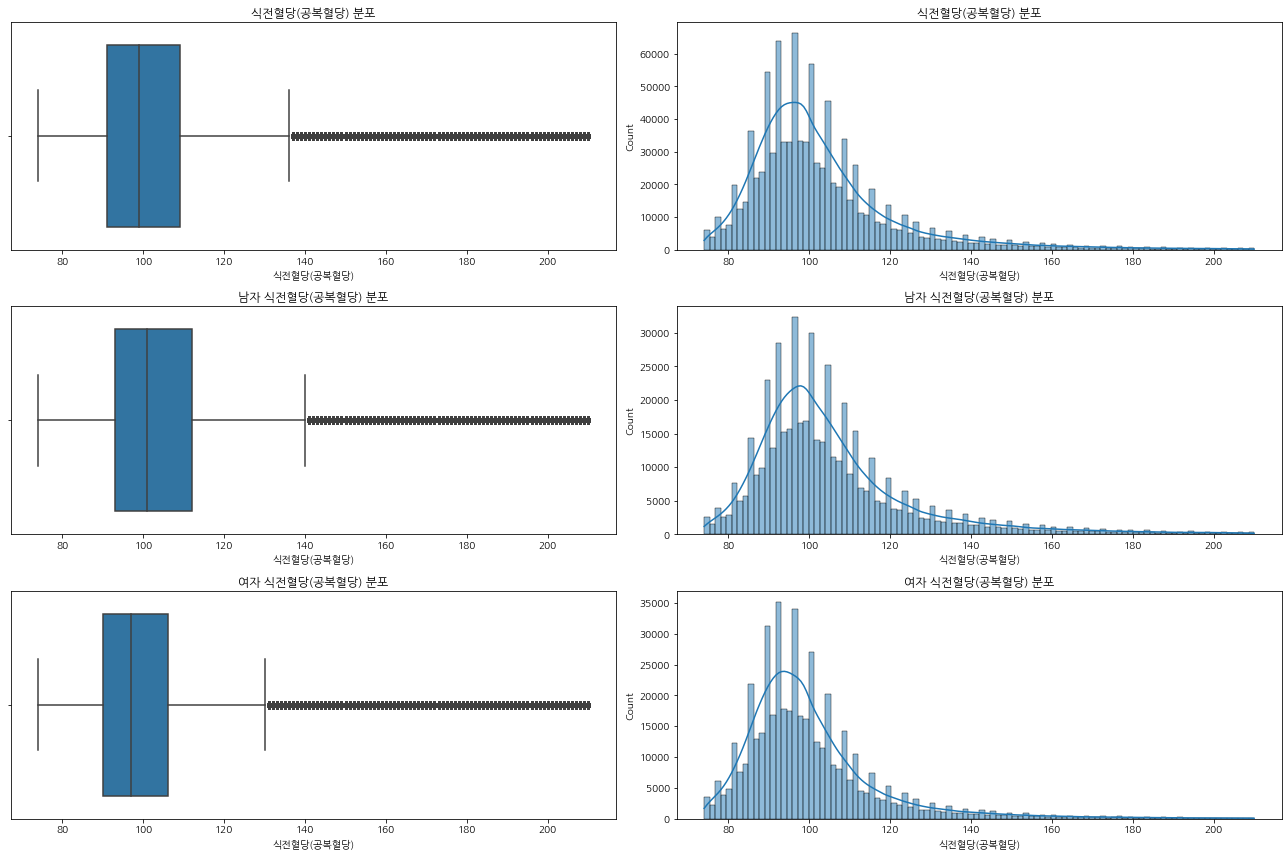

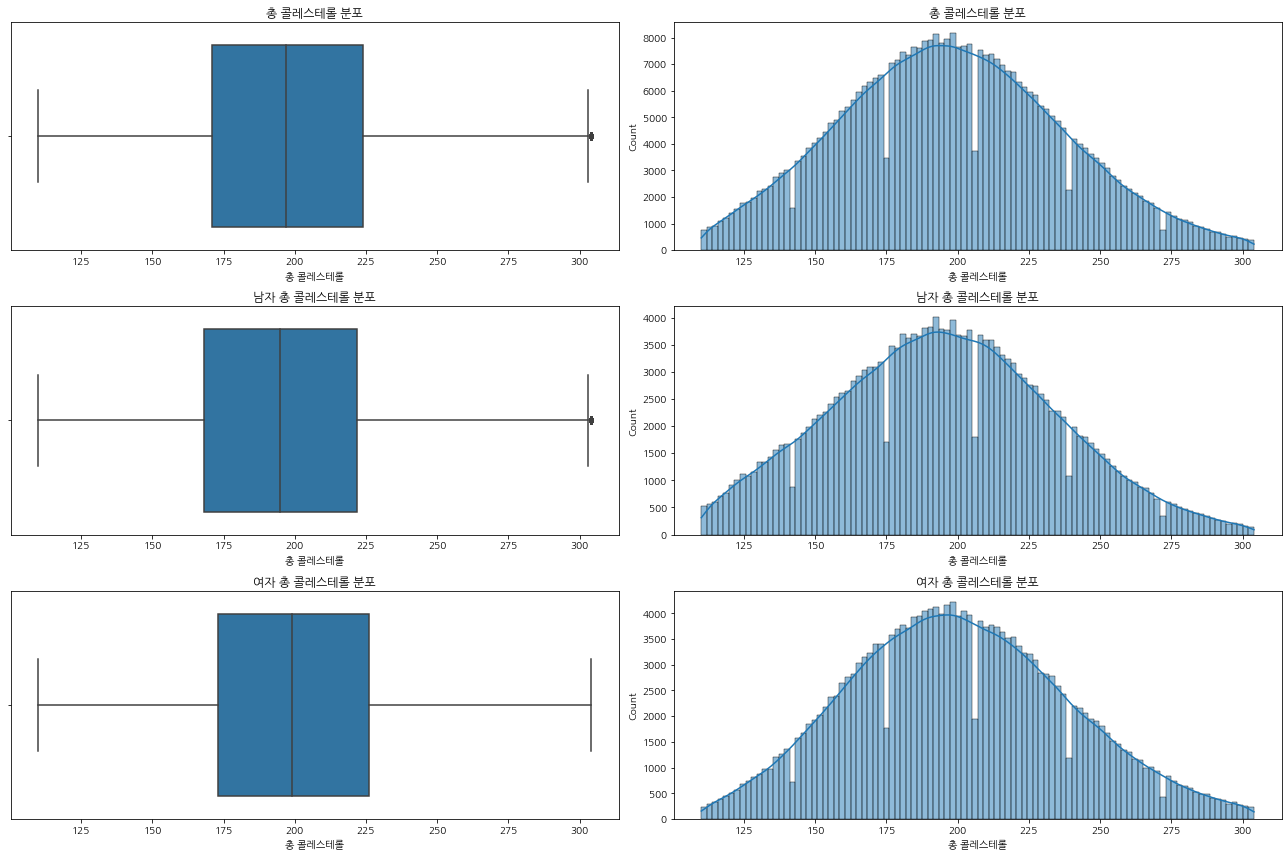

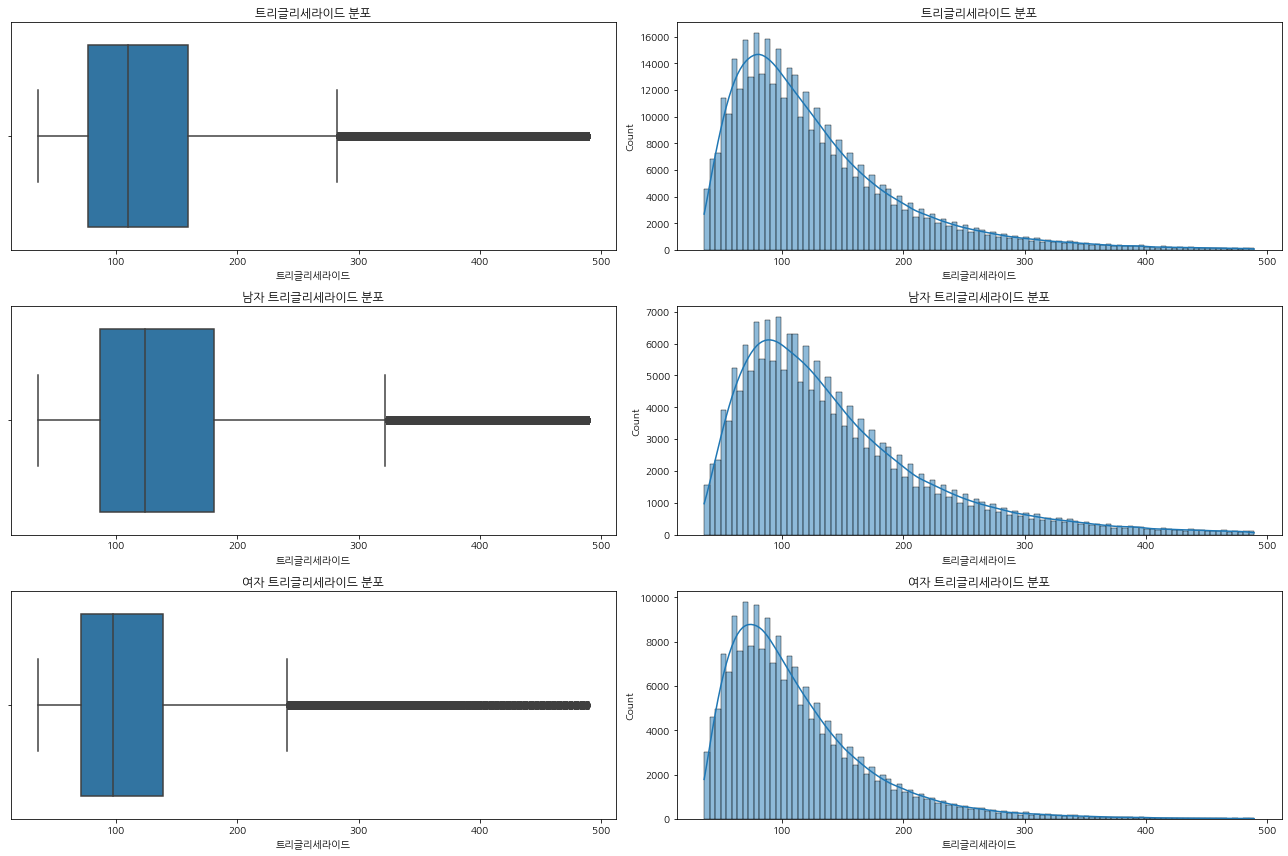

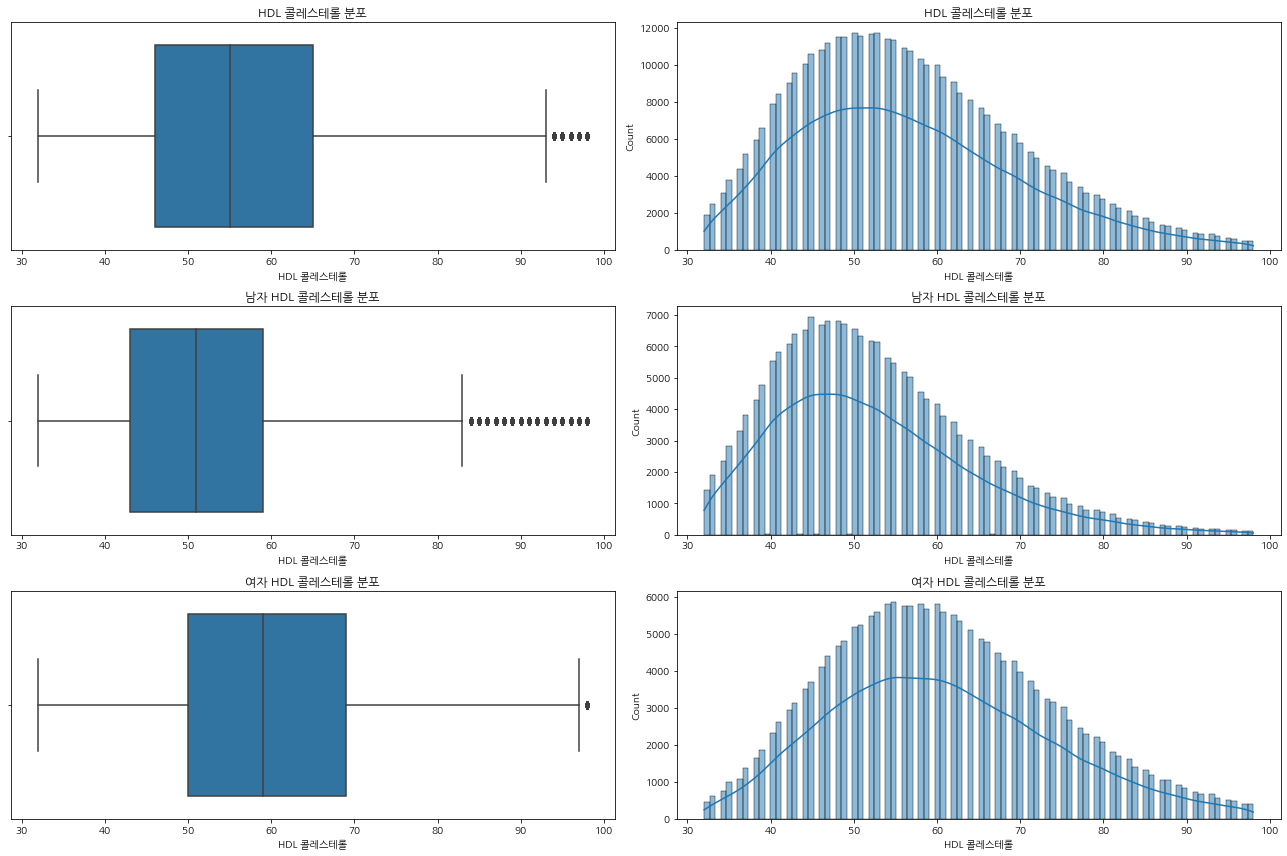

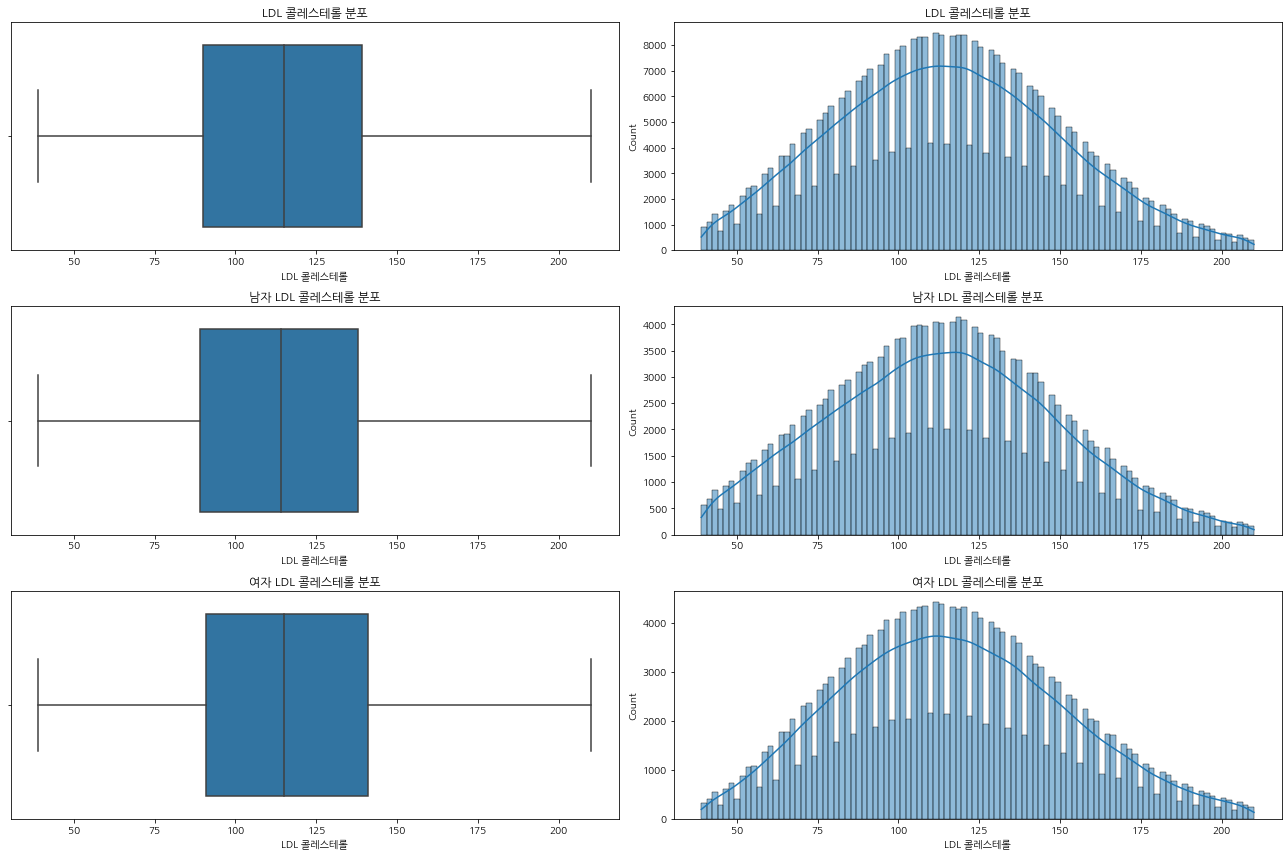

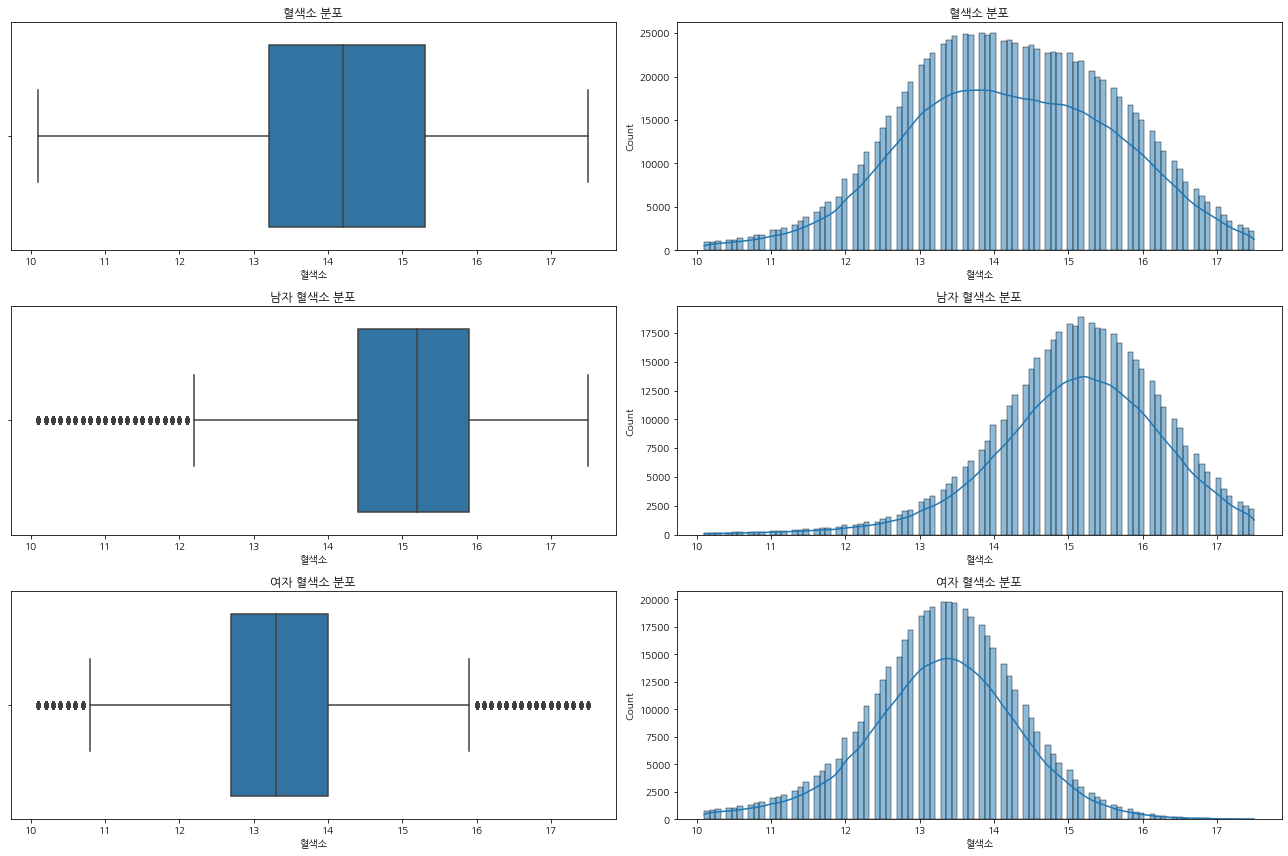

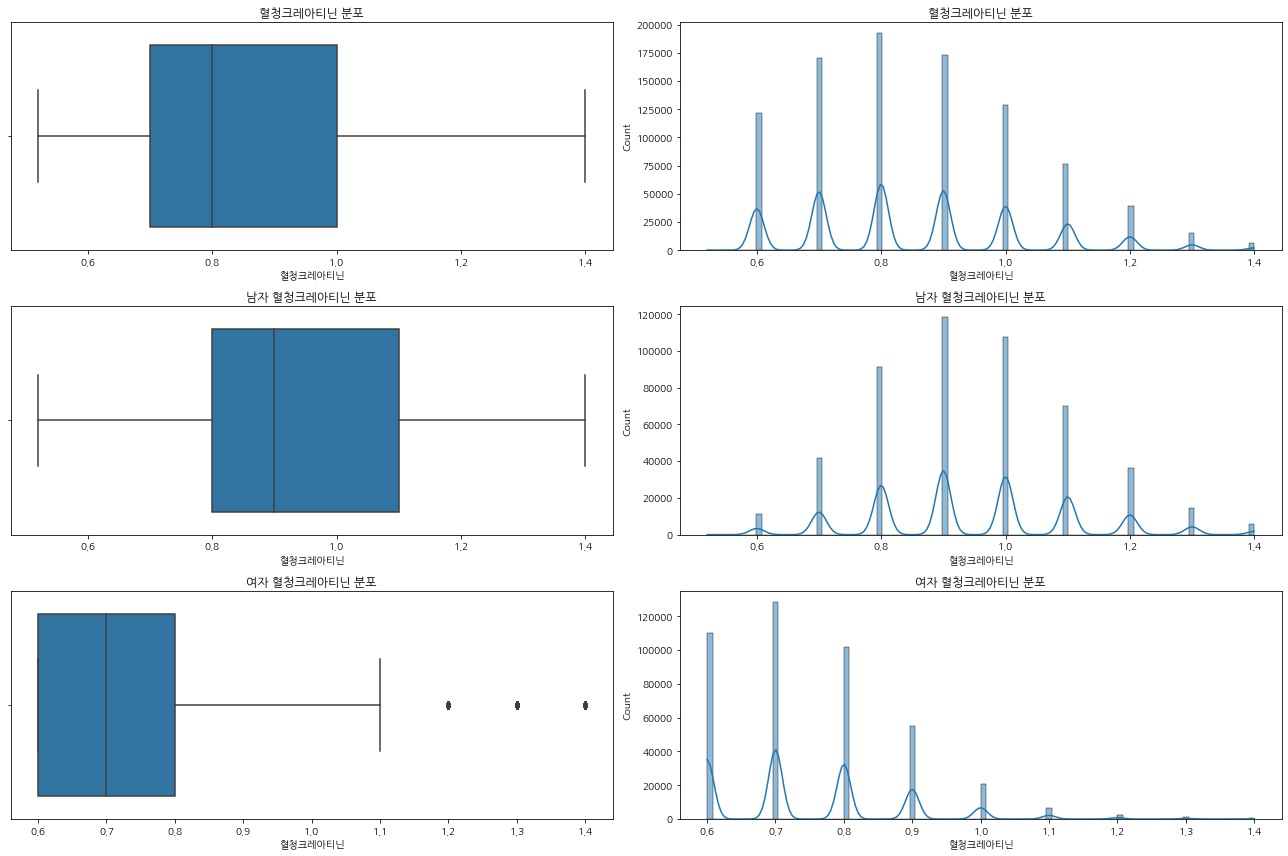

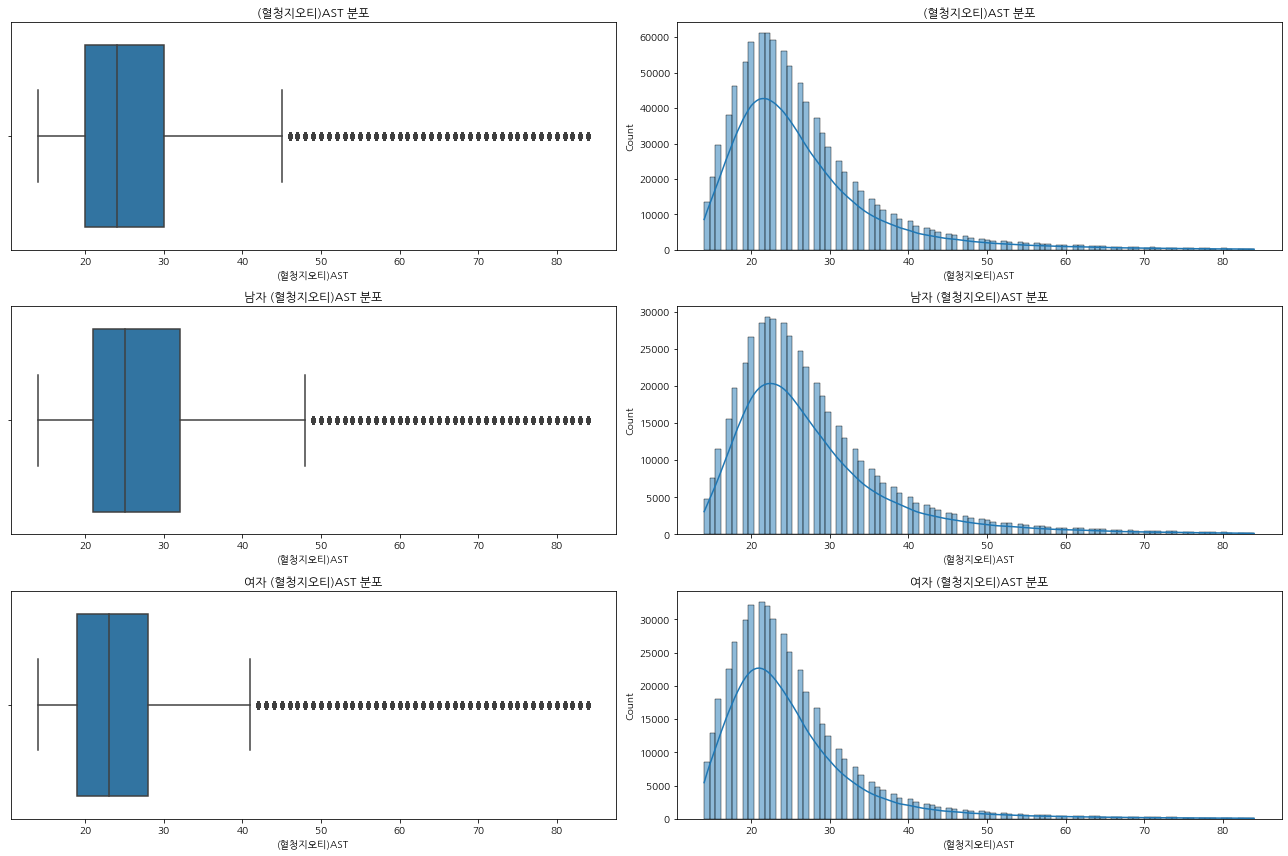

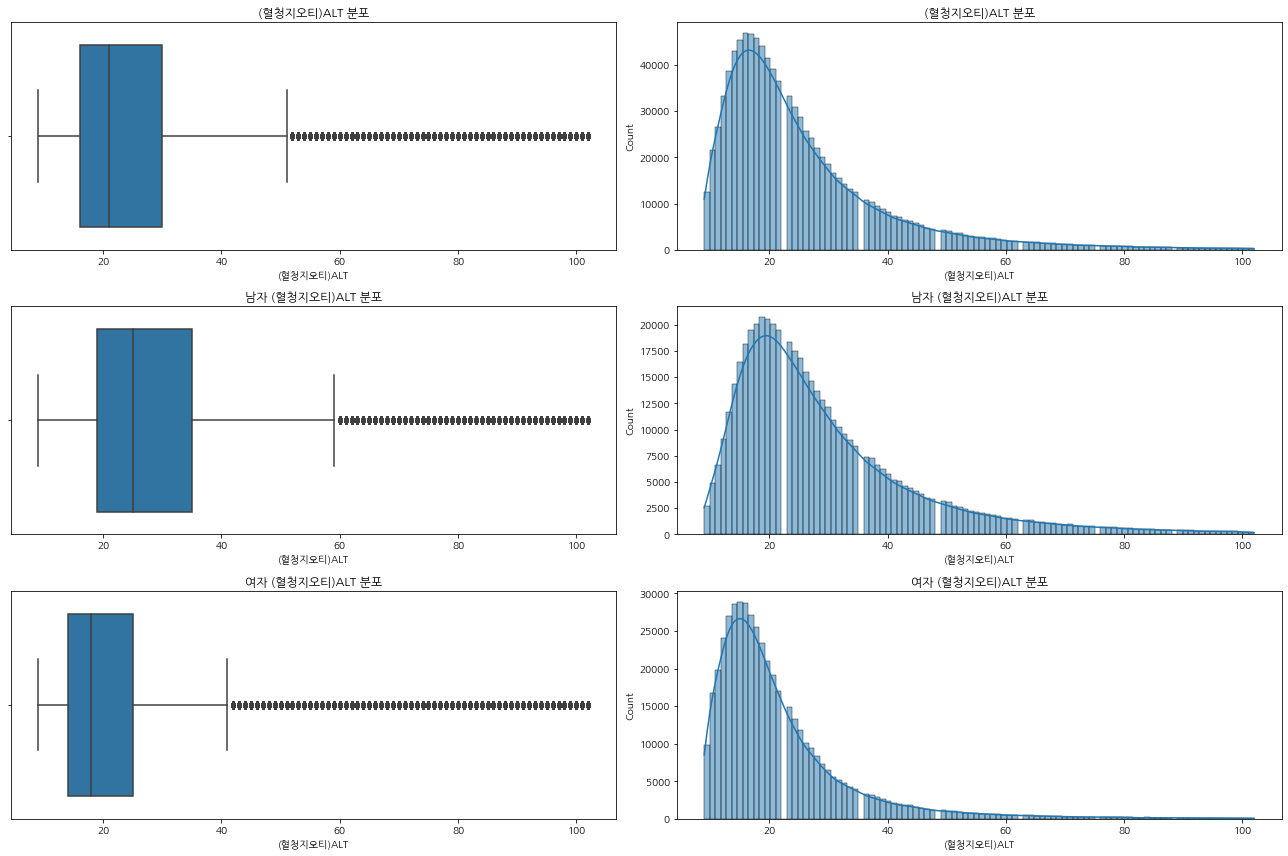

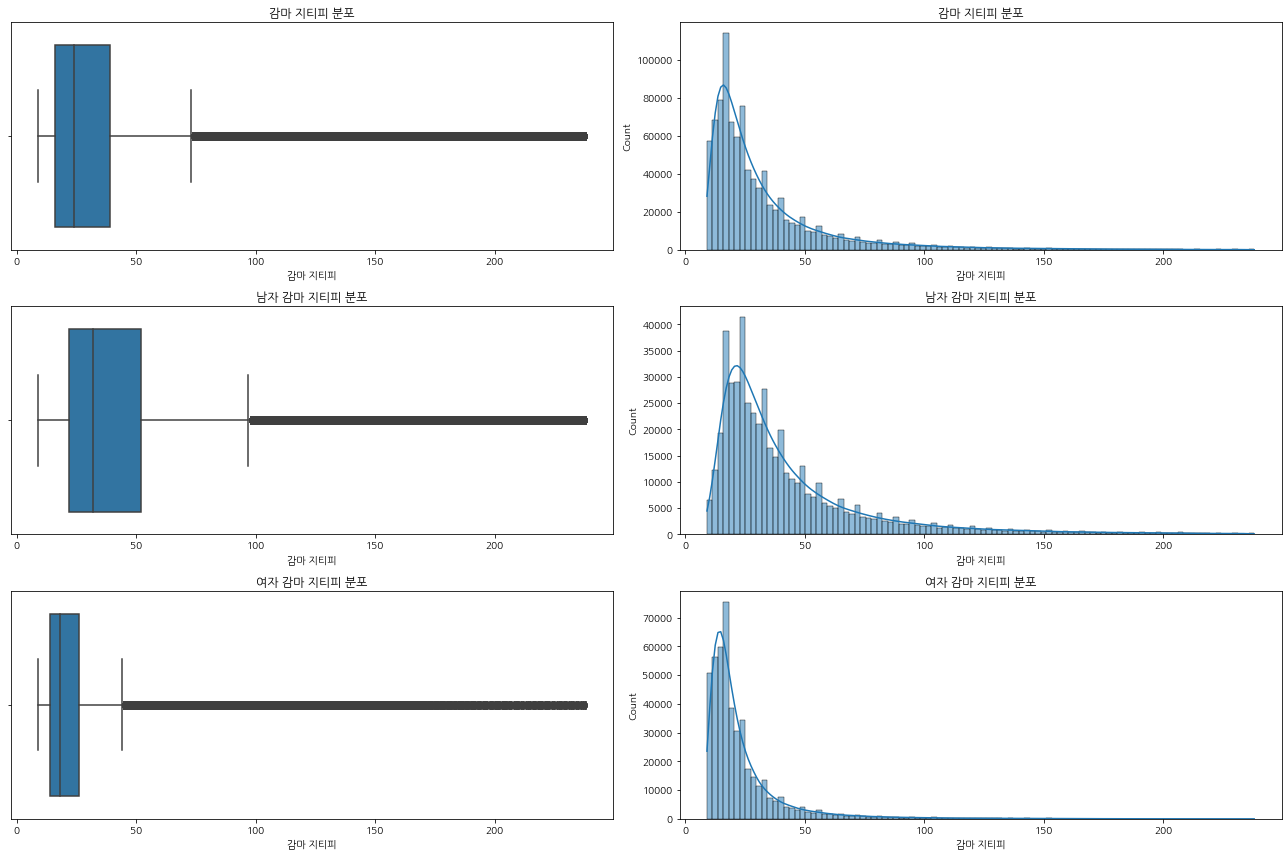

In [225]:
for i,c in enumerate(num_cols):
    fig,axes = plt.subplots(3,2,figsize=(18,12))
    sub_df = df[df[c]>-1]
    max_value = sub_df[c].quantile(0.99)
    min_value = sub_df[c].quantile(0.01)
    sns.boxplot(data=sub_df[(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[0][0]).set(title=f'{c} 분포')
    sns.histplot(data=sub_df[(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[0][1],kde=True,bins=100).set(title=f'{c} 분포')
    
    sns.boxplot(data=sub_df[(sub_df['성별코드']=='남자')&(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[1][0]).set(title=f'남자 {c} 분포')
    sns.histplot(data=sub_df[(sub_df['성별코드']=='남자')&(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[1][1],kde=True,bins=100).set(title=f'남자 {c} 분포')

    sns.boxplot(data=sub_df[(sub_df['성별코드']=='여자')&(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[2][0]).set(title=f'여자 {c} 분포')
    sns.histplot(data=sub_df[(sub_df['성별코드']=='여자')&(sub_df[c]<max_value)&(sub_df[c]>min_value)],x=c,ax=axes[2][1],kde=True,bins=100).set(title=f'여자 {c} 분포')

    plt.tight_layout()

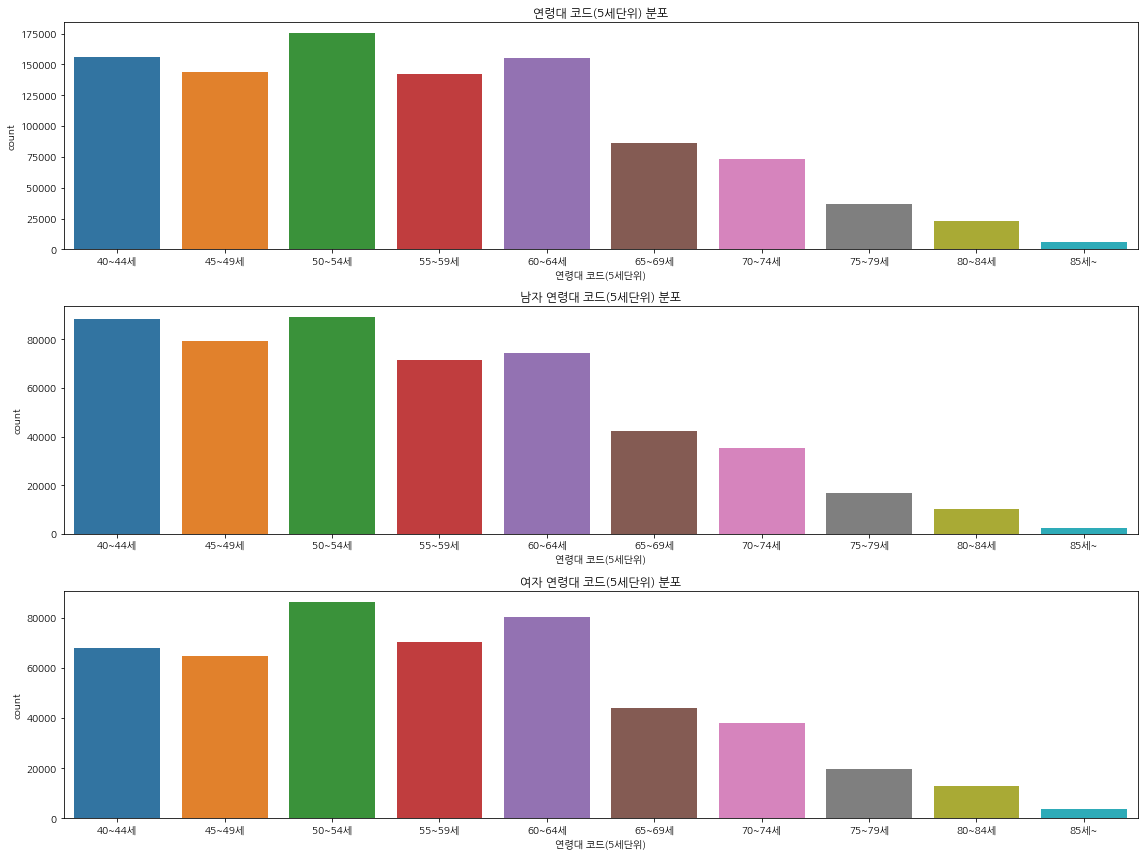

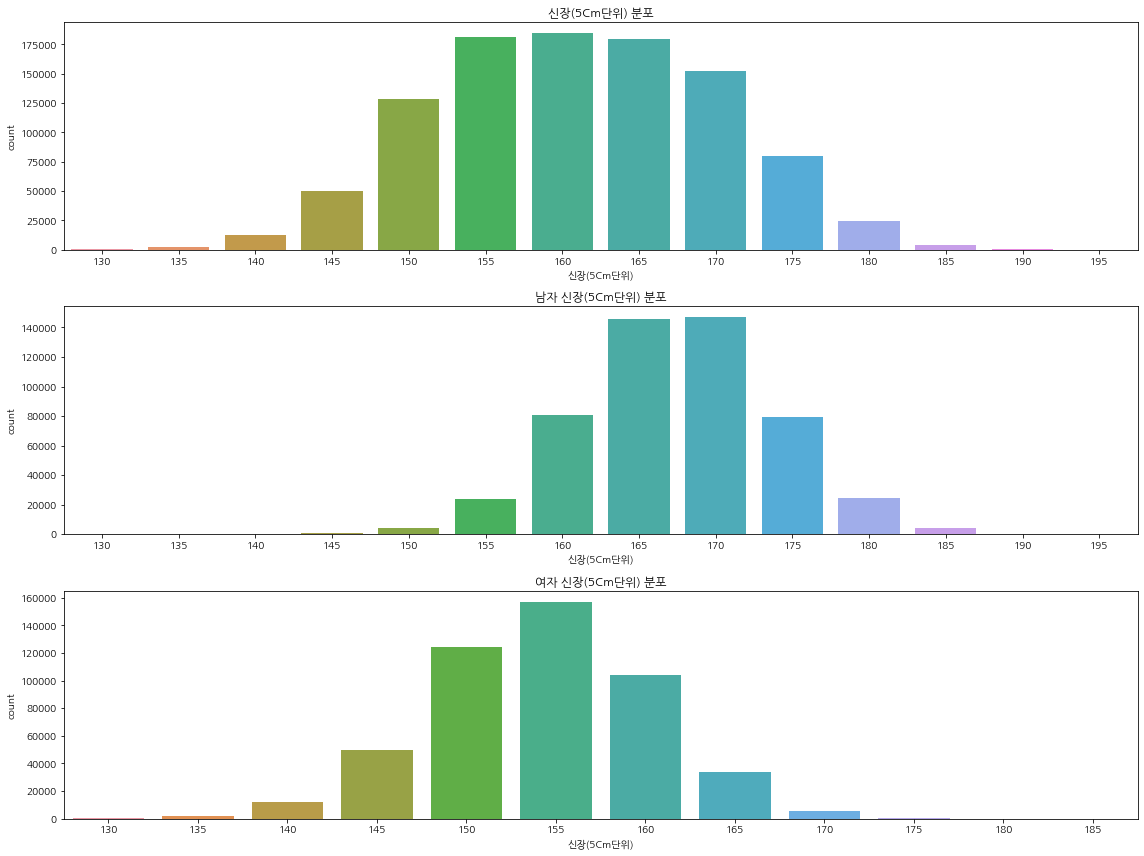

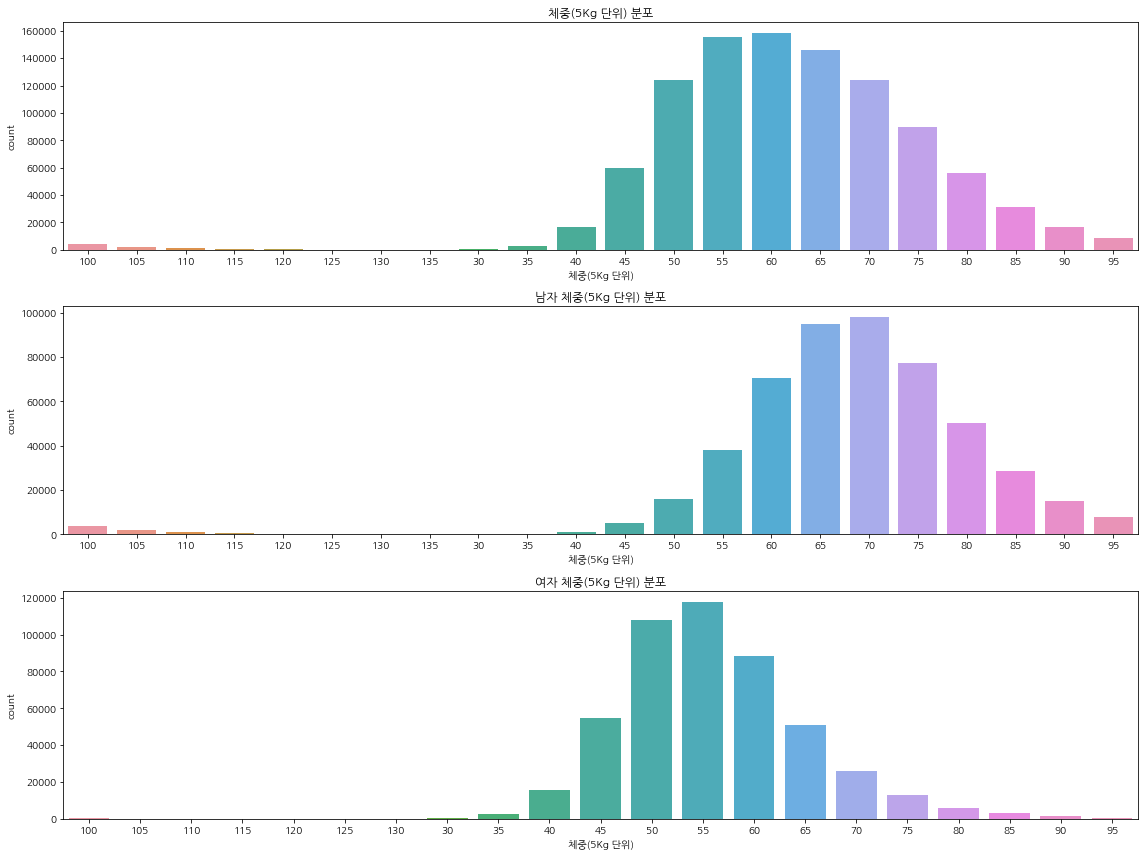

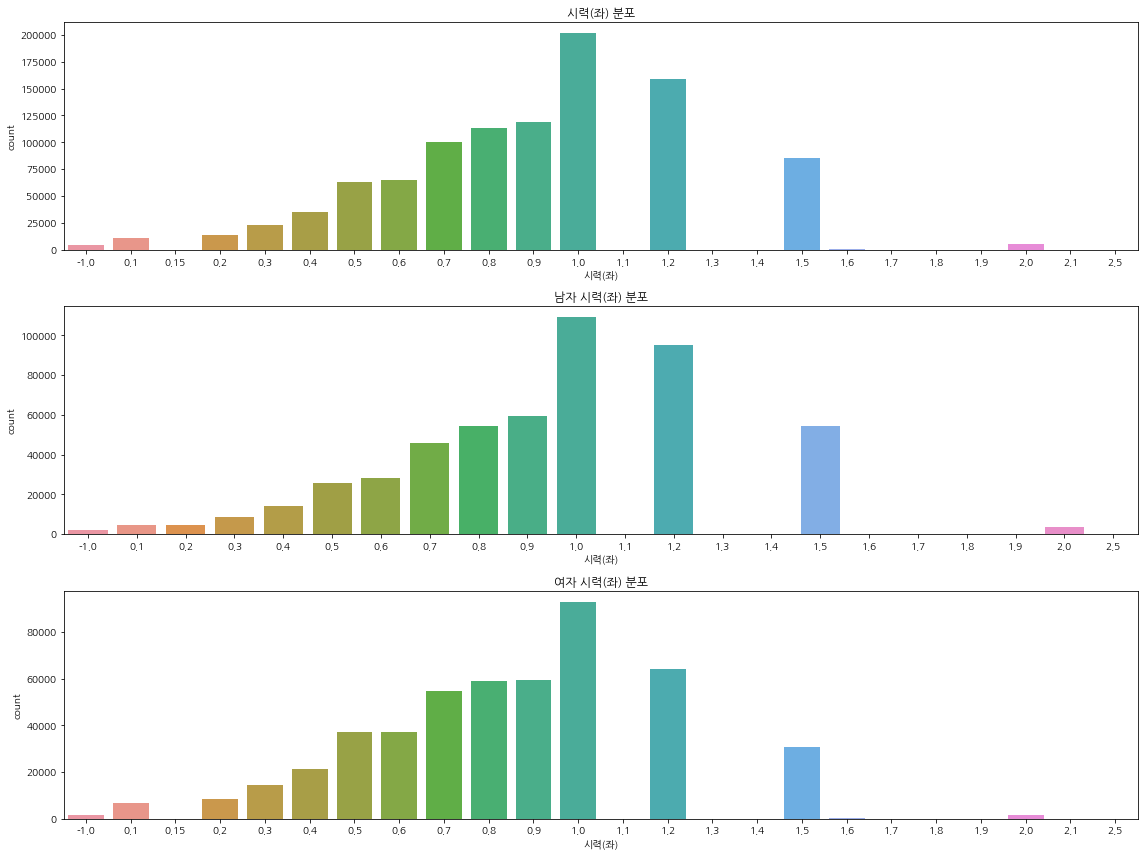

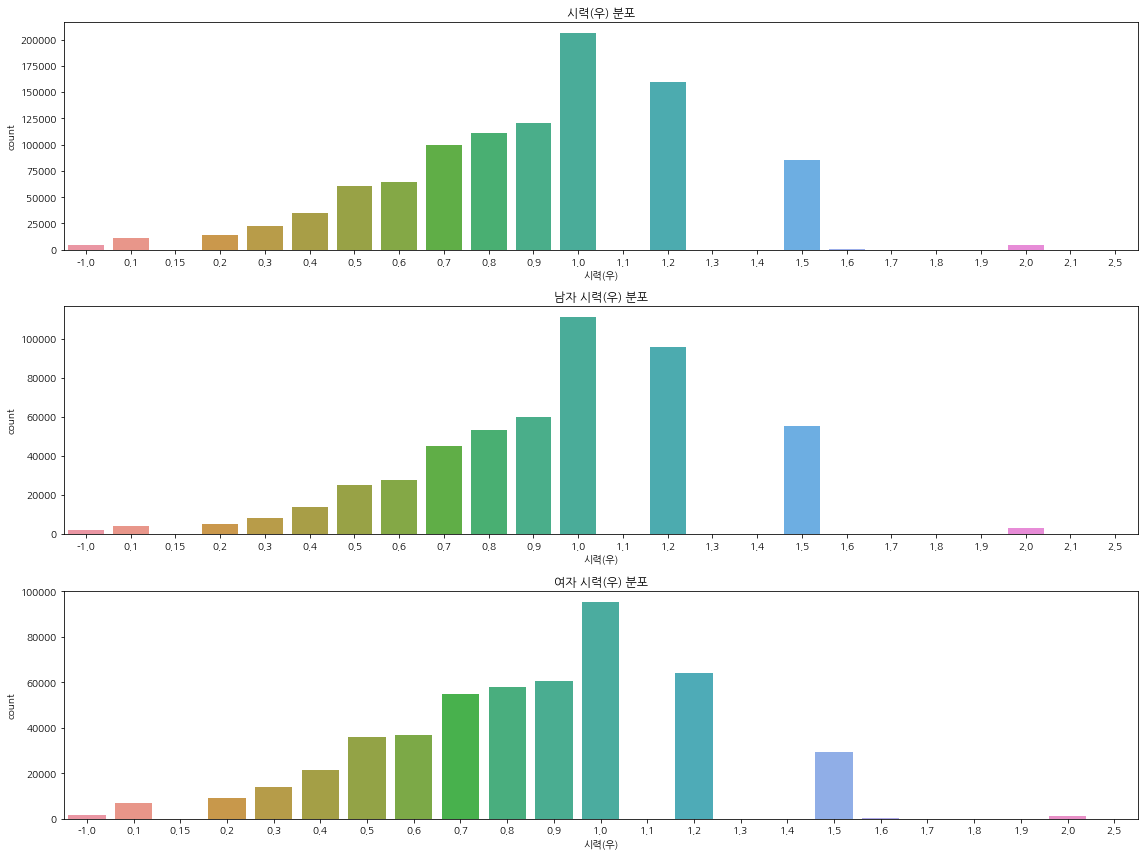

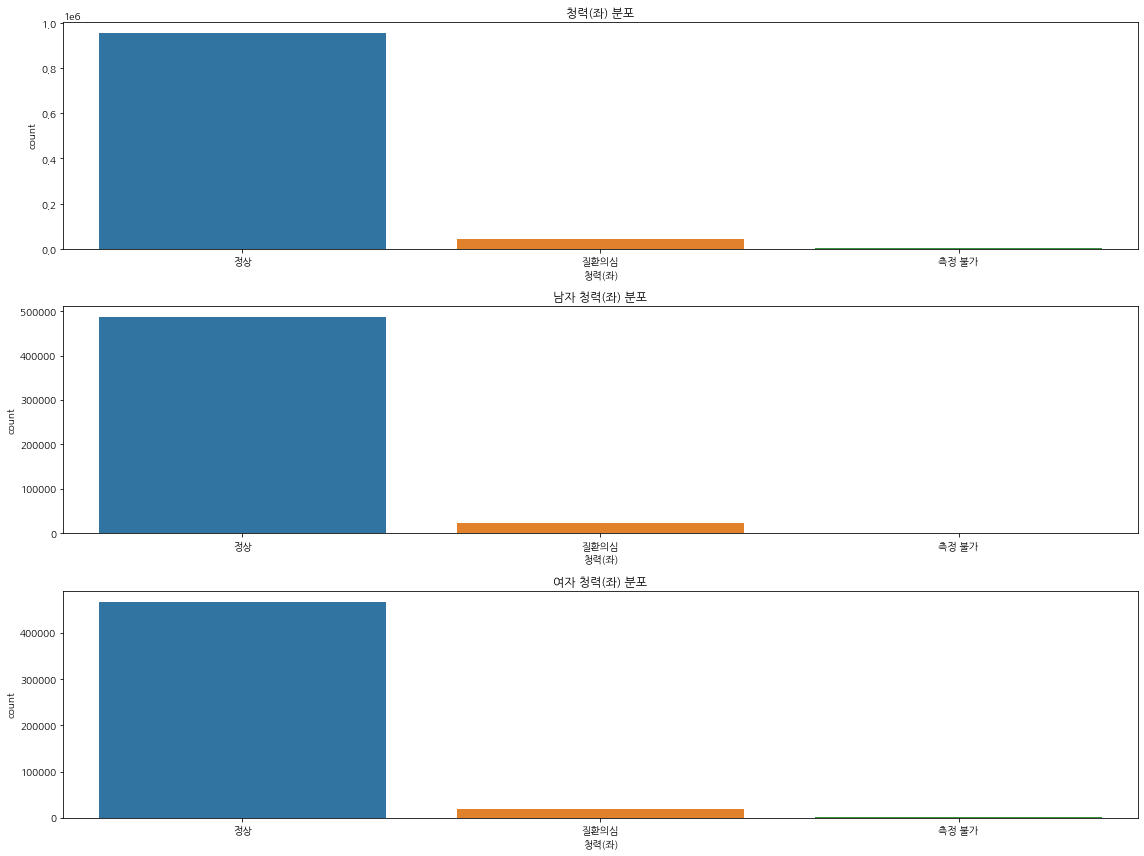

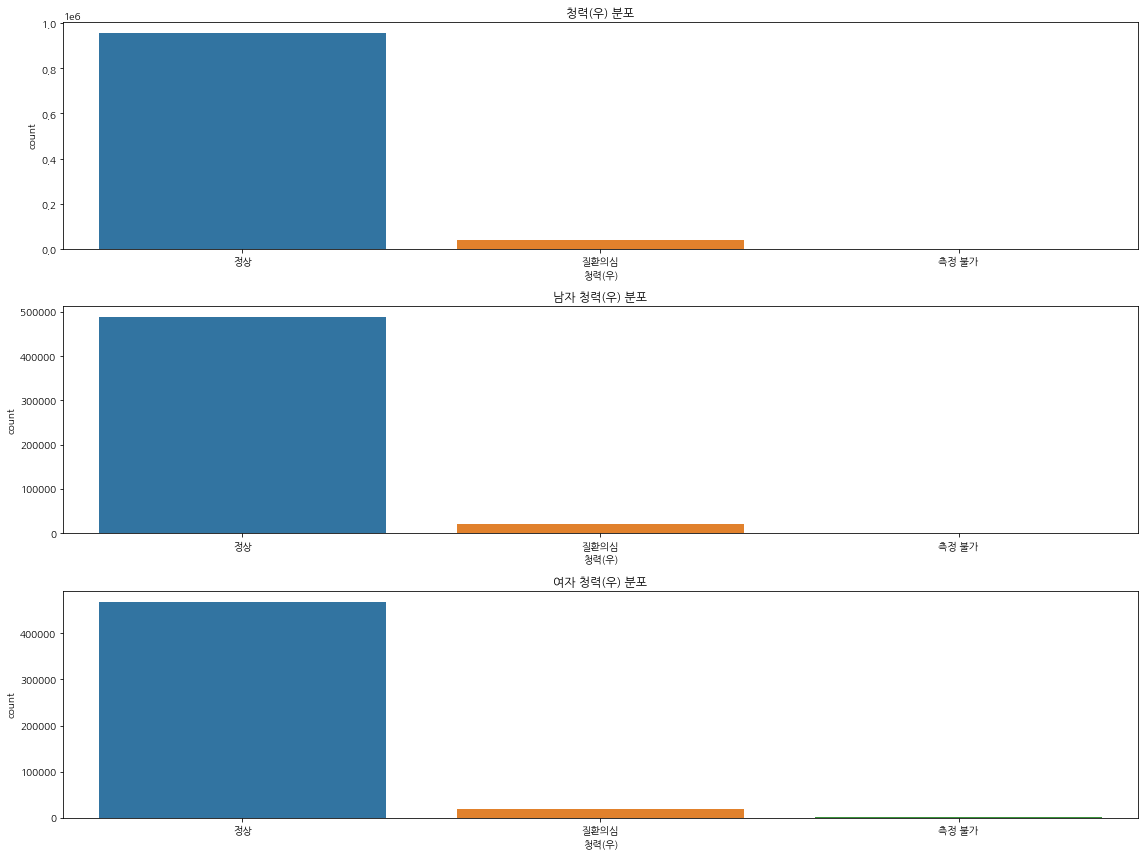

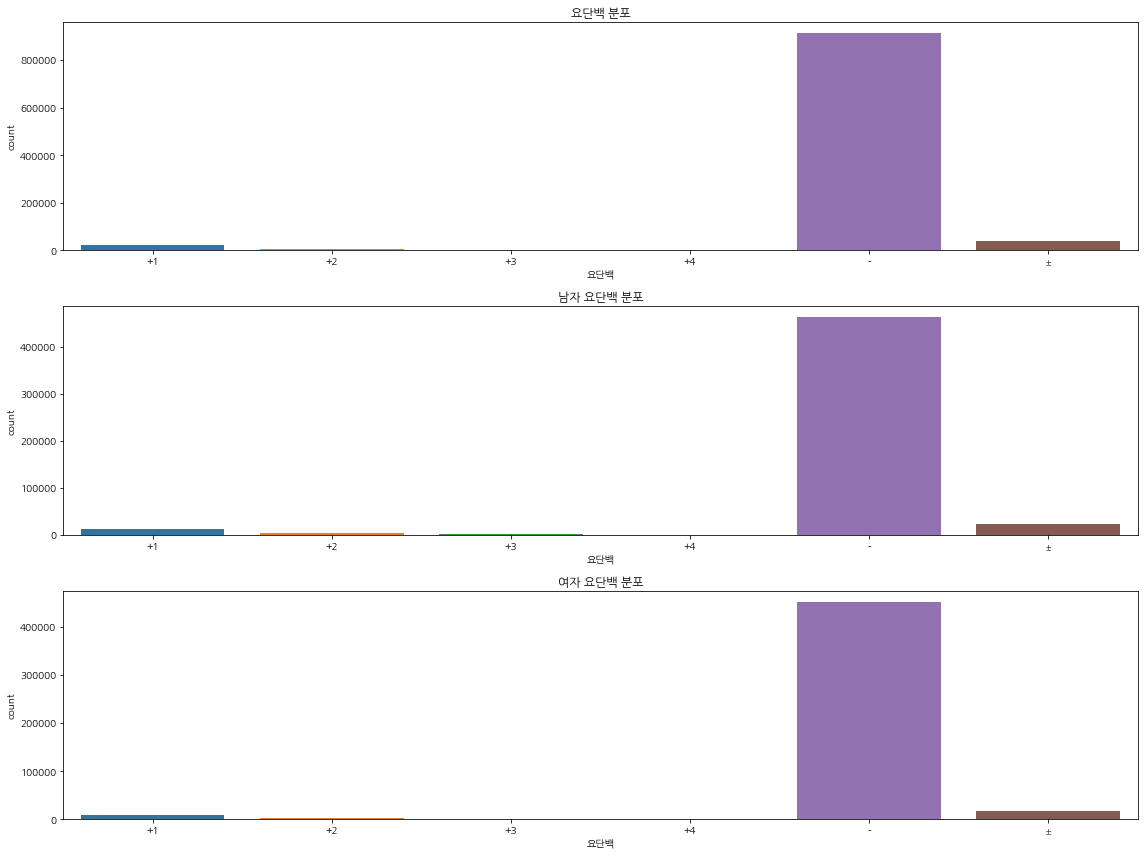

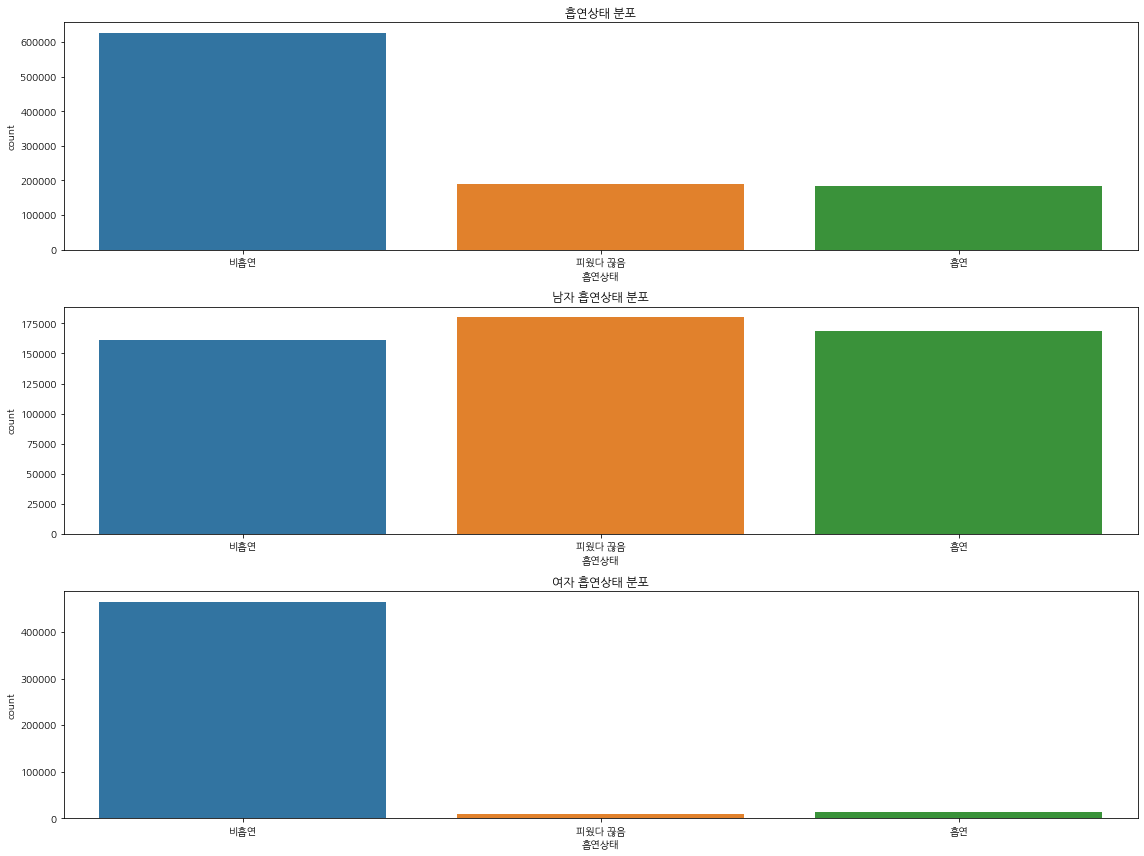

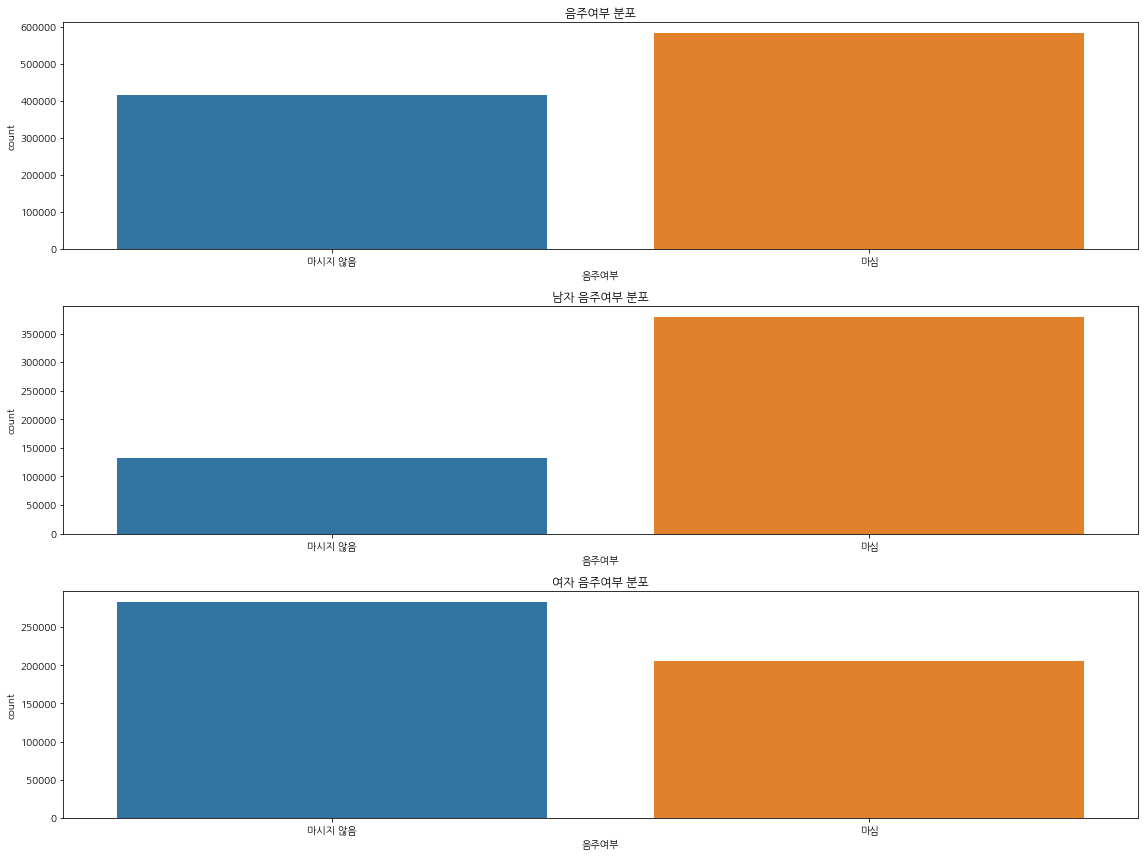

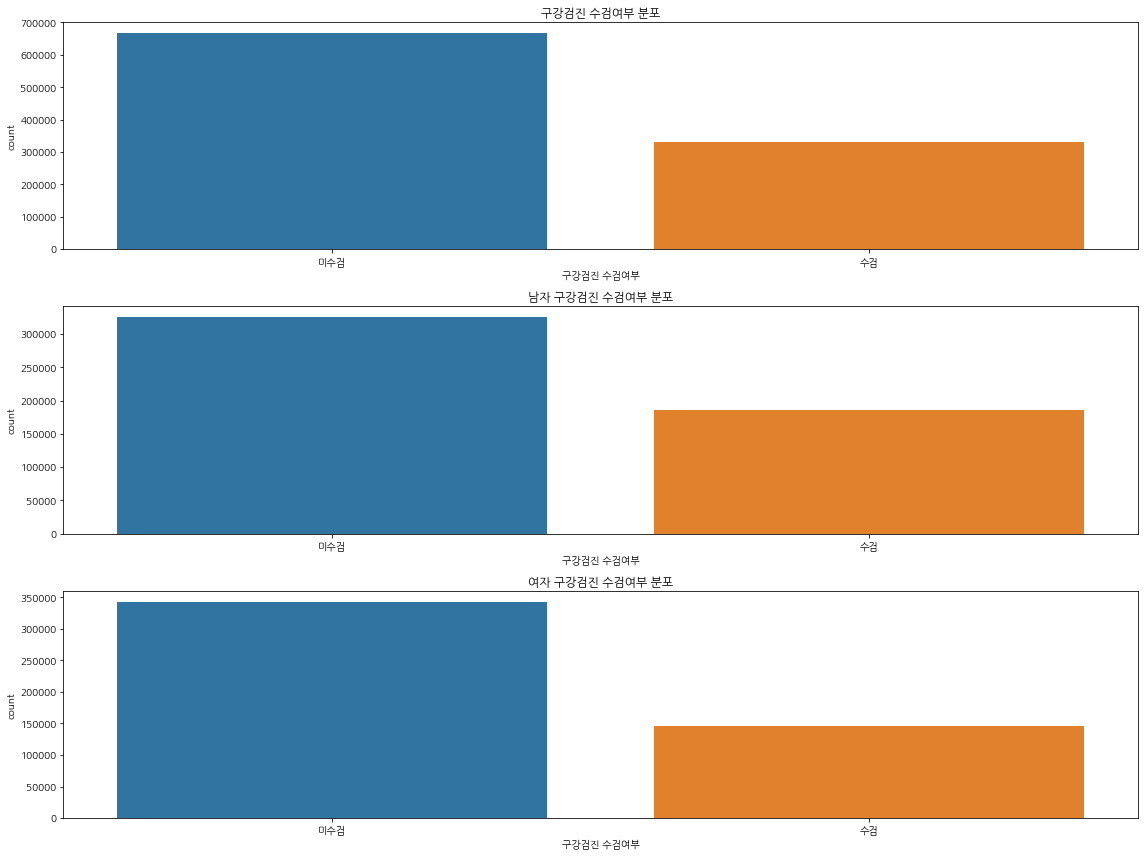

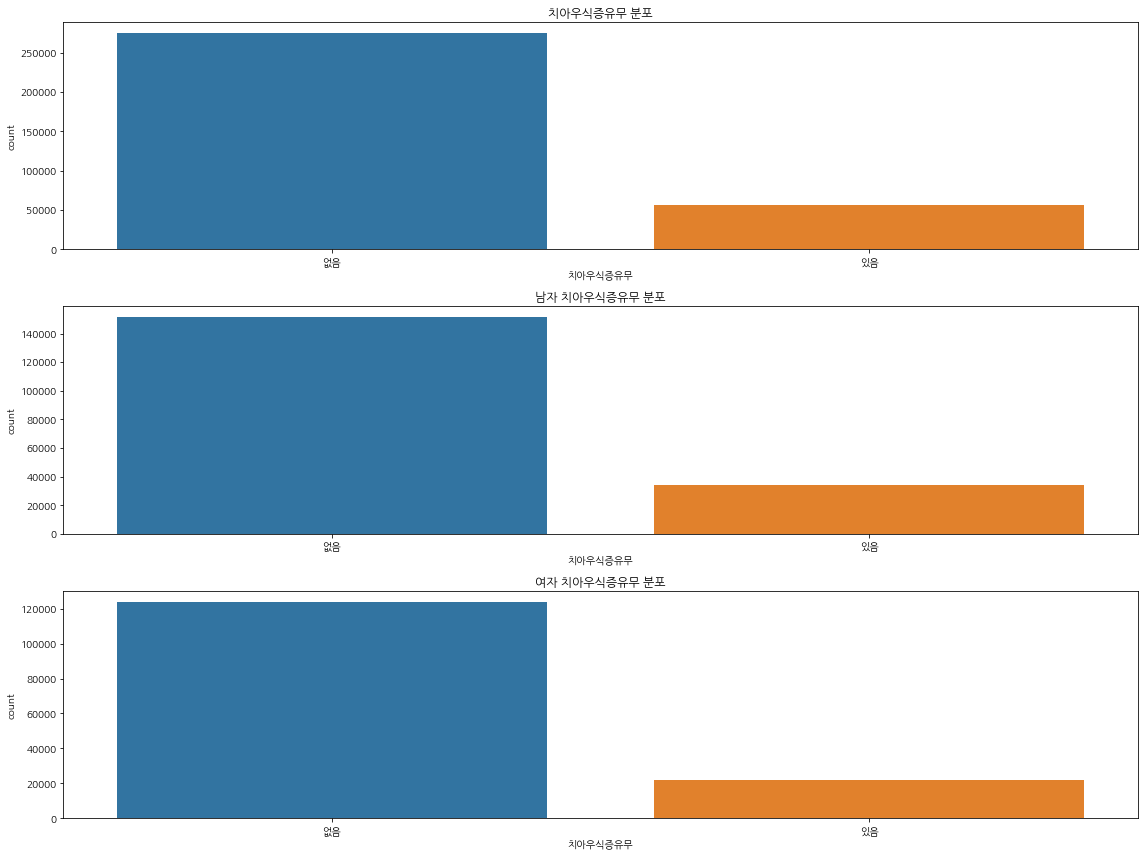

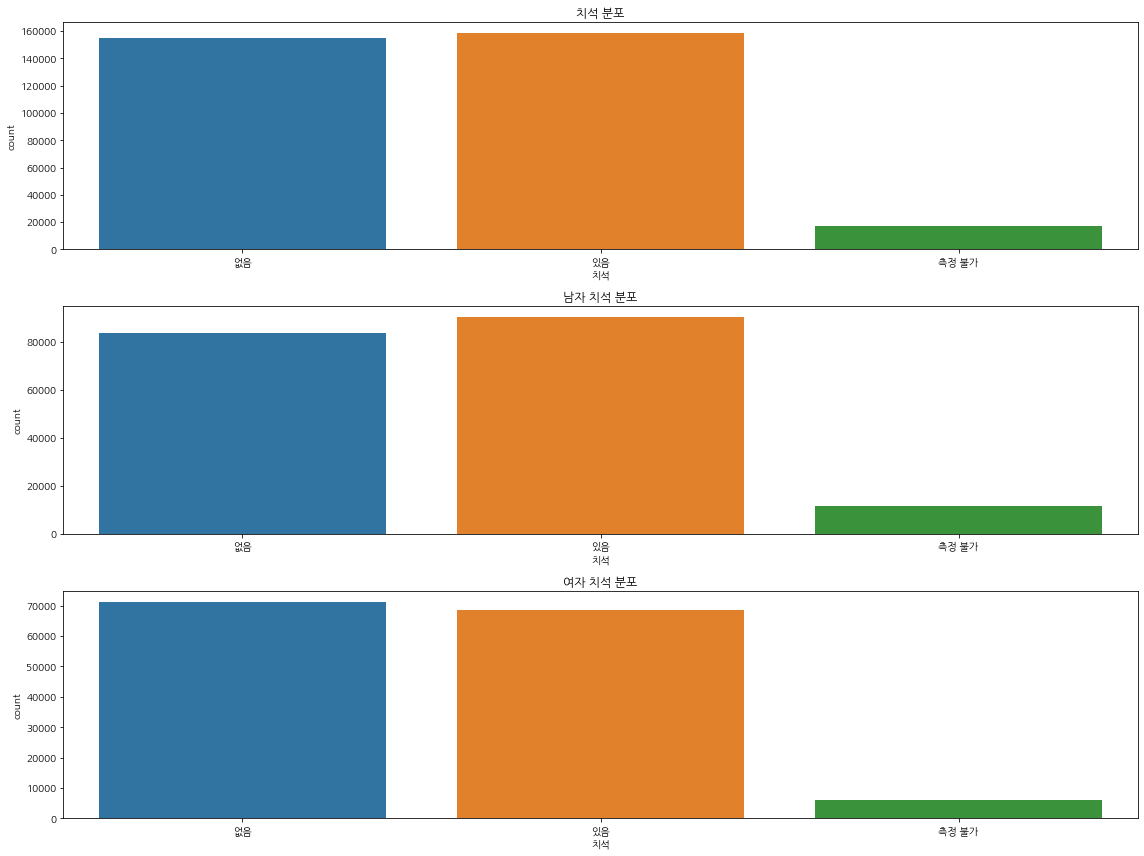

In [234]:
for i,c in enumerate(cat_cols):
    fig,axes = plt.subplots(3,1,figsize=(16,12))
    sub_df = df[df[c]!='미측정'].groupby([c,'성별코드'],as_index=False)['가입자 일련번호'].count()
    sns.barplot(data=sub_df.groupby(c,as_index=False)['가입자 일련번호'].sum(),x=c,y='가입자 일련번호',ax=axes[0]).set(title=f'{c} 분포',ylabel='count')
    sns.barplot(data=sub_df[sub_df['성별코드']=='남자'],x=c,y='가입자 일련번호',ax=axes[1]).set(title=f'남자 {c} 분포',ylabel='count')
    sns.barplot(data=sub_df[sub_df['성별코드']=='여자'],x=c,y='가입자 일련번호',ax=axes[2]).set(title=f'여자 {c} 분포',ylabel='count')
    plt.tight_layout()